In [ ]:
""" This file does the scimilarity annotation but as .ipnyb file it makes the debugging easy """

In [1]:
# Environment settings
import scanpy as sc
import warnings
from scimilarity.utils import lognorm_counts
from scimilarity import CellAnnotation, align_dataset
import utils_AT
import numpy as np
import pandas as pd
import csv

ModuleNotFoundError: No module named 'scimilarity'

In [2]:
""""  ###### VARIABLES ########  """

# Select visualization options
ALL = 0
clstr = 0
uncnstrnd_prdctn = 0
cnstrnd_prdctn = 0
min_dist = 1
gene_score = 1
annotation_path = '../models/annotation_model_v1'
#data_path2 = '../data/GSE136831_subsample.h5ad'
data_path2 = '../data/KPTracer-Data/expression/adata_processed.combined.h5ad' #(AT)
data_path = '../data/KPTracer-Data/expression/adata_processed_comp.h5ad' #(AT)
imag_name1 = utils_AT.create_image_name("_KPTrcrClstrCOMP_")
imag_name2 = utils_AT.create_image_name("_KPTrcrConstrndAntnCOMP_")
imag_name3 = utils_AT.create_image_name("_KPTrcrConstrneAntnCOMP_")
imag_name4 = utils_AT.create_image_name("_KPTrcrMinDistCOMP_")
imag_name5 = utils_AT.create_image_name("_KPTrcrGeneScoreCOMP_")
imag_name6 = utils_AT.create_image_name("_KPTrcrGeneScoreDscrtCOMP_")
""""  ###### VARIABLES ########  """

'"  ###### VARIABLES ########  '

In [10]:
# trying some things
ca = CellAnnotation(model_path=annotation_path)

KeyboardInterrupt: 

In [6]:
# trying some things
#ca = CellAnnotation(model_path=annotation_path)
ca.build_kNN(input_data=data_path)
adams2 = sc.read(data_path)



2023-11-01 12:15:40,949 - pegasusio.readwrite - INFO - h5ad file '../data/KPTracer-Data/expression/adata_processed_comp.h5ad' is loaded.
2023-11-01 12:15:40,953 - pegasusio.readwrite - INFO - Function 'read_input' finished in 4.56s.


KeyboardInterrupt: 

In [11]:
# Model read, data read
sc.set_figure_params(dpi_save=800)
warnings.filterwarnings('ignore')
ca = CellAnnotation(model_path=annotation_path)
adams2 = sc.read(data_path)
adams = sc.read(data_path2)
#(AT) to match the target gene, all name of the gene needs to be uppercase
for indx_num in range(len(adams.var.index)):
     adams.var.index.values[indx_num] = adams.var.index[indx_num].upper()
#data processing
adams = align_dataset(adams, ca.gene_order)
adams = lognorm_counts(adams)
adams.obsm['X_scimilarity'] = ca.get_embeddings(adams.X)


KeyboardInterrupt: 

In [ ]:
""" CLUSTERTING """

# Clustering
sc.pp.neighbors(adams, use_rep='X_scimilarity')
sc.tl.umap(adams)
# Visualization
if ALL or clstr:
    sc.pl.umap(adams, color='Cluster-Name', legend_fontsize=8, save=imag_name1, legend_loc='on data')

""" CLUSTERTING """

In [7]:
""" UNCONSTRAINED ANNOTATION """

# - nn_idxs: indicies of cells in the SCimilarity reference.
# - nn_dists: the minimum distance within k=50 nearest neighbors.
# - nn_stats: a dataframe containing useful metrics
#           such as (distribution of celltypes in k=50 nearest neighbors.

# Processing
predictions, nn_idxs, nn_dists, nn_stats = ca.get_predictions_kNN(adams.obsm['X_scimilarity'])
adams.obs['predictions_unconstrained'] = predictions.values
# (AT) get the distribution of predicted annotation
celltype_counts = adams.obs.predictions_unconstrained.value_counts()
well_represented_celltypes = celltype_counts[celltype_counts>20].index
# print out top 19 unconstrained predictions in a csv file
celltype_counts = adams.obs.predictions_unconstrained.value_counts()
target_celltypes = celltype_counts[:19]
# Visualization
if ALL or uncnstrnd_prdctn:
    sc.pl.umap(adams[adams.obs.predictions_unconstrained.isin(well_represented_celltypes)],
           color='predictions_unconstrained',
           legend_fontsize=8, save=imag_name2, legend_loc = "on data")

""" UNCONSTRAINED ANNOTATION """

KeyboardInterrupt: 

In [2]:
""" CONSTRAINED ANNOTATION """
# Constrained classfication (reduces the noise)
target_celltypes = adams.obs['predictions_unconstrained'].value_counts()[:20].index.tolist()
ca.safelist_celltypes(target_celltypes)
adams = ca.annotate_dataset(adams, skip_preprocessing=True) # we already pre-processed the data
# Visualization
if ALL or cnstrnd_prdctn:
    sc.pl.umap(adams, color='celltype_hint', legend_fontsize=5, save=imag_name3, legend_loc = "on data")

""" CONSTRAINED ANNOTATION """

NameError: name 'adams' is not defined

In [3]:
""" print out unconstrained predictions in a csv file """
celltype_counts = adams.obs.predictions_unconstrained.value_counts()
max_cellcount = celltype_counts
import csv
csv_filename = ("../files/yangCOMP_uncnstrnd_prdctn.csv")
cell_name_arr = []
cell_num_arr = []
for i in range(max_cellcount.shape[0]):
        #final_data = (max_cellcount.index[i], max_cellcount[i])
        cell_name_arr.append(max_cellcount.index[i])
        cell_num_arr.append(max_cellcount[i])
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write header
    csv_writer.writerow(["YANG_COMP_data_scimilarity_unconstrained_prediction", "Numbers"])
    for cellName, cellNum in zip(cell_name_arr, cell_num_arr) :
         csv_writer.writerow([cellName, cellNum])
    #csv_writer.writerow(zip(cell_name_arr, cell_number_arr))
print()

NameError: name 'adams' is not defined

In [49]:
""" plot the cell annotation distribution """
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("../files/yangCOMP_uncnstrnd_prdctn.csv")

# Add labels and a title
# fig, ax = plt.subplots()
# ax.barh(df['YANG_COMP_data_scimilarity_unconstrained_prediction'][:10], df['Numbers'][:10])
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel("Cell numbers")
# ax.set_title("Yang comprehensive data scimilarity annotation distribution")
# image_name = utils_AT.create_image_name("Yang_COMP_dist")
# plt.savefig(image_name)
# plt.show()
# print()

fig, ax = plt.subplots()
ax.barh(df['YANG_COMP_data_scimilarity_unconstrained_prediction'][:10], df['Ratio'][:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Cell Ratio (%)")
ax.set_title("Yang comprehensive data scimilarity annotation distribution")
image_name = "figures/"+utils_AT.create_image_name("Yang_COMP_dist_ratio", format='.jpg')
plt.savefig(image_name, bbox_inches='tight', dpi=150)
plt.show()
print()

# plt.bar(df['Numbers'][:10], df['YANG_COMP_data_scimilarity_unconstrained_prediction'][:10])
# plt.xlabel("Cell name")
# plt.ylabel("Number")
# #plt.setp(get_xticklabels(), fontsize=10, rotation='vertical')
# plt.title("Yang comprehensive data scimilarity annotation distribution")
# Show the plot

KeyboardInterrupt: 

In [40]:
""" for each Yang annotation, it gives Scimilarity annotations and their %"""
clstr_antn_prcntg = []
yang_clstrs = adams.obs['Cluster-Name'].unique()
for clstr in yang_clstrs:
    subset_adams = adams[adams.obs['Cluster-Name'].isin([clstr])]
    column_values = subset_adams.obs['celltype_hint']
    unique_values = column_values.unique()
    for celltypes in unique_values:
        numOfCells = len(subset_adams[subset_adams.obs['celltype_hint'] == celltypes])
        ratio = round(100 * (numOfCells / subset_adams.shape[0]), 2)
        final_data = (clstr, celltypes, numOfCells, ratio)
        clstr_antn_prcntg.append(final_data)
        print()
# Specify the CSV file name
csv_filename = ("../files/Yang_COMP_scimilarity_annotation_ratio.csv")
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Yang_annotation", "Scimilarity_annotation", "Num_of_cells_Sc", "Ratio_Sc"])
    for items in clstr_antn_prcntg:
        csv_writer.writerow(items)

In [46]:
yang_celltype_counts = adams.obs['Cluster-Name'].value_counts()
max_cellcount = yang_celltype_counts
import csv
csv_filename = ("../files/yangCOMP_Yang_annotation.csv")
cell_name_arr = []
cell_num_arr = []
for i in range(max_cellcount.shape[0]):
        #final_data = (max_cellcount.index[i], max_cellcount[i])
        cell_name_arr.append(max_cellcount.index[i])
        cell_num_arr.append(max_cellcount[i])
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write header
    csv_writer.writerow(["YANG_COMP_data_Yang_annotation", "Numbers"])
    for cellName, cellNum in zip(cell_name_arr, cell_num_arr) :
         csv_writer.writerow([cellName, cellNum])
    #csv_writer.writerow(zip(cell_name_arr, cell_number_arr))
print()

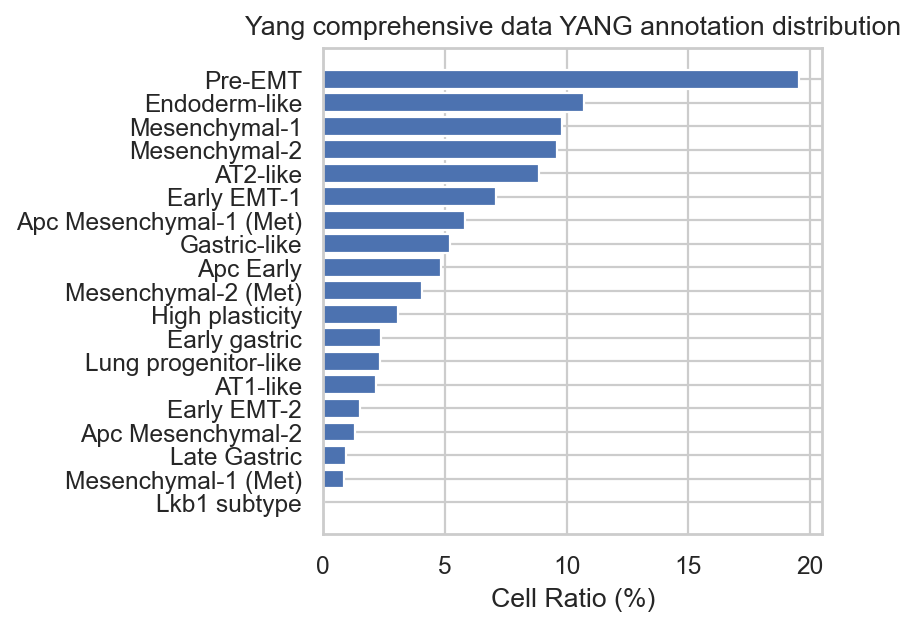

In [47]:
df = pd.read_csv("../files/yangCOMP_Yang_annotation.csv")

fig, ax = plt.subplots()
ax.barh(df["YANG_COMP_data_Yang_annotation"], df['Ratio'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Cell Ratio (%)")
ax.set_title("Yang comprehensive data YANG annotation distribution")
image_name = "figures/"+utils_AT.create_image_name("Yang_COMP_dist_ratio_YA", format='.jpg')
plt.savefig(image_name, bbox_inches='tight', dpi=150)
plt.show()
print()


In [2]:
data_path2 = '../data/KPTracer-Data/expression/adata_processed_combined_SCANTN.h5ad' #(AT)
data_path = '../data/KPTracer-Data/expression/adata_processed_comp_SCANTN.h5ad' #(AT)
adams_old = sc.read(data_path2)
adams_comp = sc.read(data_path)

In [19]:
""" mark the cell values where comprehensive and refind Yang data annotaion by scimilarity are not same """
import matplotlib.pyplot as plt
adams_comp.obs['SC_difrnt_clstr'] = adams_old.obs['celltype_hint'].values
cell_loc = np.where(adams_comp.obs['SC_difrnt_clstr'].values.codes != adams_comp.obs['celltype_hint'].values.codes, 0, 1)

umap1 = adams_comp.obsm['X_umap'][:, 0]
umap2 = adams_comp.obsm['X_umap'][:, 1]
color_map = {0: 'gray', 1: 'red'}
colors = [color_map[val] for val in cell_loc]
plt.scatter(umap1, umap2, c=colors)
plt.savefig("fig.jpg")
plt.show()
print()

<Figure size 640x480 with 1 Axes>